<a href="https://colab.research.google.com/github/pastal24/rep/blob/master/MIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import json
import pandas as pd
import numpy as np

import tensorflow 

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling1D,GlobalMaxPooling1D,GlobalAveragePooling2D,GlobalMaxPooling2D,ConvLSTM2D,Bidirectional,Input,Activation,UpSampling1D,Conv1D,MaxPooling1D,AveragePooling1D,Attention,AdditiveAttention,Conv2D,AveragePooling2D, Dense, TimeDistributed, MaxPooling2D, UpSampling2D , Flatten ,Reshape ,Dropout,LSTM,RepeatVector,ActivityRegularization,BatchNormalization,Softmax
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras import backend as K

In [ ]:

!pip install attention-sampling

ERROR: Operation cancelled by user


In [ ]:
import pickle
import pandas as pd
import numpy as np
objects={}
objects2={}
infile = open("/content/gdrive/My Drive/GdataML100_40.pickle",'rb')
objects = pickle.load(infile, encoding='latin1')
# infile2 = open("/content/gdrive/My Drive/GdataML100_25_50.pickle",'rb')
# objects2 = pickle.load(infile2, encoding='latin1')

In [ ]:

data_dem=pd.read_excel("/content/gdrive/My Drive/thesis/Demographics.xlsx")

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/thesis/SDATA_SEPTEMBER_new.csv") 
data['Secondary ID'].value_counts()


8b0c496cc31f42fa    1
11a9e65564567d48    1
2be1fe7ec81e1b5e    1
c6ffffbbce0a8fe9    1
5b21e87a204e9879    1
                   ..
fa1ca92b6d69c880    1
a83230cbb772f842    1
edfe952987be6876    1
8e9de02b429f50ef    1
393ac67b9a76136f    1
Name: Secondary ID, Length: 128, dtype: int64

In [ ]:
df=pd.DataFrame.from_dict(objects)

df.isna().sum()



y           0
X_flight    0
ids         0
X_hold      0
time        0
dtype: int64

In [ ]:
df.drop([ 'time'], axis=1,inplace=True)


In [ ]:
dff=pd.DataFrame.from_dict(objects2)

dff.isna().sum()



Series([], dtype: float64)

In [ ]:
data.drop(data.iloc[:, 11:], inplace = True, axis = 1) 
data.rename(columns={"Secondary ID": "ids"},inplace=True)


In [ ]:

data = data[data.ids != 'e75ecd6e5c41a2cc']


In [ ]:
data['UPDRS_22'] = data[' UPDRS_22_UEXTR_LEFT_E1_1_C1 '] + data[' UPDRS_22_UEXTR_RIGHT_E1_1_C1 ']  
data['UPDRS_23'] = data [' UPDRS_23_RIGHT_E1_1_C1 '] + data[' UPDRS_23_LEFT_E1_1_C1 ']
data['UPDRS_22'].value_counts()

0    57
2    28
1    24
3    19
4     4
7     1
5     1
Name: UPDRS_22, dtype: int64

In [ ]:

data['Study Subject ID'].unique()

array(['SUK01', 'SUK02', 'SUK21', 'SUK03', 'SUK04', 'SUK05', 'SUK06',
       'SUK07', 'SUK08', 'SUK09', 'SUK10', 'SUK11', 'SUK12', 'SUK13',
       'SUK14', 'SUK15', 'SUK16', 'SUK17', 'SUK18', 'SUK19', 'SUK20',
       'SUK22', 'SUK23', 'SUK24', 'SUK27', 'SUK28', 'SUK29', 'SUK30',
       'SUK31', 'SUK36', 'SUK37', 'SUK38', 'SUK39', 'SGR01', 'SGR02',
       'SGR03', 'SGR04', 'SGR05', 'SGR06', 'SGR07', 'SGR08', 'SGR09',
       'SGR10', 'SGR11', 'SGR12', 'SGR13', 'SGR14', 'SGR15', 'SGR16',
       'SGR17', 'SGR18', 'SGR19', 'SGR20', 'SGR21', 'SGR22', 'SGR23',
       'SGR24', 'SGR25', 'SGR26', 'SGR27', 'SGR28', 'SGR29', 'SGR30',
       'SGR31', 'SGR32', 'SGR33', 'SGR34', 'SGR35', 'SDE02', 'SDE07',
       'SDE01', 'SDE03', 'SDE04', 'SDE05', 'SDE06', 'SDE08', 'SDE09',
       'SDE10', 'SDE11', 'SDE12', 'SDE13', 'SDE14', 'SDE15', 'SDE16',
       'SDE17', 'SDE18', 'SDE19', 'SDE20', 'SDE21', 'SDE22', 'SDE23',
       'SDE24', 'SDE25', 'SDE26', 'SDE27', 'SDE28', 'SDE29', 'SDE30',
       'SDE31', 'SDE

In [ ]:
dff[['y']]=dff[['y']].replace([0.0,1.0,2.0],[1,0,0])
dff['y'].value_counts()

NameError: ignored

In [ ]:


dff['X_flight'].isna().sum()


In [ ]:
df2=pd.merge(df, data,how='outer')
df2
df2.rename(columns={" UPDRS_31_E1_1_C1 ": "UPDRS_31_E1_1_C1"},inplace=True)
df2

,y,X_flight,ids,X_hold,Study Subject ID,Protocol ID,Subject Status,Sex,UPDRS_22_UEXTR_RIGHT_E1_1_C1,UPDRS_22_UEXTR_LEFT_E1_1_C1,UPDRS_23_RIGHT_E1_1_C1,UPDRS_23_LEFT_E1_1_C1,UPDRS_31_E1_1_C1,SUM_PART_3_E1_1_C1,UPDRS_22,UPDRS_23
0,2.0,"[0.304, 0.206, 0.287, 0.28, 0.575, 0.148, 0.39...",0168568f68e1b02b,"[0.10599999999976717, 0.11599999999452848, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0168568f68e1b02b,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0168568f68e1b02b,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,"[0.312, 0.386, 0.608, 0.37, 0.295, 0.781, 0.26...",0168568f68e1b02b,"[0.09000000002561137, 0.0650000000023283, 0.06...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.247, 0.1...",0168568f68e1b02b,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1070000000181...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666,NaN,NaN,58dab6321800bfe0,NaN,SDE49,iprognosis-sdata-study - EK 451112017,available,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23667,NaN,NaN,8e9de02b429f50ef,NaN,SDE50,iprognosis-sdata-study - EK 451112017,available,f,0.0,0.0,1.0,1.0,0.0,3.0,0.0,2.0
23668,NaN,NaN,4365496b0b6b8342,NaN,SDE51,iprognosis-sdata-study - EK 451112017,available,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23669,NaN,NaN,c6ffffbbce0a8fe9,NaN,CNT_1,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2.UPDRS_22=df2.sort_values(['ids','UPDRS_22']).groupby(['ids','UPDRS_22']).UPDRS_22.ffill()
df2['UPDRS_22'].isna().sum()
# df.COL=df.sort_values(['ID','COL']).COL.ffill()
df2.UPDRS_23=df2.sort_values(['ids','UPDRS_23']).groupby(['ids','UPDRS_23']).UPDRS_23.ffill()
df2['UPDRS_23'].isna().sum()
df2.UPDRS_31_E1_1_C1=df2.sort_values(['ids','UPDRS_31_E1_1_C1']).groupby(['ids','UPDRS_31_E1_1_C1']).UPDRS_31_E1_1_C1.fillna(df2.UPDRS_31_E1_1_C1)
df2['UPDRS_23'].isna().sum()



In [ ]:
 df2.groupby('ids').ffill().fillna('')
 df2.groupby('ids').bfill().fillna('')
 df2['UPDRS_23'].isna().sum()

18938

In [ ]:
s = df2['ids'].ffill()
m = s == df2['ids'].bfill()
df2.loc[m, 'ids'] = s
df2['UPDRS_23'].isna().sum()

18938

In [ ]:
for each in df_tot.groupby(["Subject_id"], sort=True): print (each)  

('Leontios',      index    y  ... UPDRS_22 UPDRS_23
0      739  2.0  ...      0.0      0.0
1      740  2.0  ...      0.0      0.0
2      741  2.0  ...      0.0      0.0
3      742  2.0  ...      0.0      0.0
4      743  2.0  ...      0.0      0.0
..     ...  ...  ...      ...      ...
391   1130  2.0  ...      0.0      0.0
392   1131  2.0  ...      0.0      0.0
393   1132  2.0  ...      0.0      0.0
394   1133  2.0  ...      0.0      0.0
395   1134  2.0  ...      0.0      0.0

[396 rows x 17 columns])
('SDE 43',      index    y  ... UPDRS_22 UPDRS_23
396   1154  1.0  ...      0.0      0.0
397   1155  1.0  ...      0.0      0.0
398   1156  1.0  ...      0.0      0.0
399   1157  1.0  ...      0.0      0.0
400   1158  1.0  ...      0.0      0.0
..     ...  ...  ...      ...      ...
558   1316  1.0  ...      0.0      0.0
559   1317  1.0  ...      0.0      0.0
560   1318  1.0  ...      0.0      0.0
561   1319  1.0  ...      0.0      0.0
562   1320  1.0  ...      0.0      0.0

[167 rows x 1

In [ ]:


df2.rename(columns={"Study Subject ID": "Subject_id"},inplace=True)
# df2.Subject_id=df2.groupby(['ids','Subject_id']).Subject_id.ffill()
df2['Subject_id'].isna().sum()


18938

In [ ]:
df2[['y']]=df2[['y']].replace([0.0,1.0,2.0],[1,0,0])
df2

In [ ]:
df2['X_flight'].isna().sum()
df_new=df2.dropna(subset=['X_flight'])
df2=df2.dropna(subset=['UPDRS_22', 'UPDRS_23','X_flight'])
# df_train=df2[0:1120]
# df_train['y'].value_counts()
# df_train[['y']]=df_train[['y']].replace([0.0,1.0,2.0],[1,0,0])
# df_train

In [ ]:
# dff=df2[:995]
df2=df2[31752:40513-94].reset_index() 
df2.drop("index",axis=1,inplace=True)




In [ ]:

df2['UPDRS_22'].value_counts()

In [ ]:
# dff=dff.append(df2[df2.Subject_id == 'SUK38'])
df2=df2[df2.Subject_id != 'SUK38']
df2


,y,X_flight,ids,X_hold,Subject_id,Protocol ID,Subject Status,Sex,UPDRS_22_UEXTR_RIGHT_E1_1_C1,UPDRS_22_UEXTR_LEFT_E1_1_C1,UPDRS_23_RIGHT_E1_1_C1,UPDRS_23_LEFT_E1_1_C1,UPDRS_31_E1_1_C1,SUM_PART_3_E1_1_C1,UPDRS_22,UPDRS_23
0,2.0,"[0.304, 0.206, 0.287, 0.28, 0.575, 0.148, 0.39...",0168568f68e1b02b,"[0.10599999999976717, 0.11599999999452848, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0168568f68e1b02b,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0168568f68e1b02b,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,"[0.312, 0.386, 0.608, 0.37, 0.295, 0.781, 0.26...",0168568f68e1b02b,"[0.09000000002561137, 0.0650000000023283, 0.06...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.247, 0.1...",0168568f68e1b02b,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1070000000181...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666,NaN,NaN,58dab6321800bfe0,NaN,SDE49,iprognosis-sdata-study - EK 451112017,available,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23667,NaN,NaN,8e9de02b429f50ef,NaN,SDE50,iprognosis-sdata-study - EK 451112017,available,f,0.0,0.0,1.0,1.0,0.0,3.0,0.0,2.0
23668,NaN,NaN,4365496b0b6b8342,NaN,SDE51,iprognosis-sdata-study - EK 451112017,available,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23669,NaN,NaN,c6ffffbbce0a8fe9,NaN,CNT_1,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

!pip install plot-model

In [ ]:
# df2 = df2[df2.groupby('Subject_id').ids.transform(len) < 3000]
# dff=dff.append(df2[df2.groupby('Subject_id').Subject_id.transform(len) < 10])
df2 = df2[df2.groupby('Subject_id').Subject_id.transform(len) >= 2]
# dff

In [ ]:
# df2['UPDRS_22'] = df2['UPDRS_22'].apply(np.int64)
# df2['UPDRS_23'] = df2['UPDRS_23'].apply(np.int64)
# df2['UPDRS_31_E1_1_C1'] = df2['UPDRS_31_E1_1_C1'].apply(np.int64)
# df2['ids']

df2=df2.reset_index()

In [ ]:
df2

,y,X_flight,ids,X_hold,Subject_id,Protocol ID,Subject Status,Sex,UPDRS_22_UEXTR_RIGHT_E1_1_C1,UPDRS_22_UEXTR_LEFT_E1_1_C1,UPDRS_23_RIGHT_E1_1_C1,UPDRS_23_LEFT_E1_1_C1,UPDRS_31_E1_1_C1,SUM_PART_3_E1_1_C1,UPDRS_22,UPDRS_23
739,2.0,"[0.911, 0.494, 0.635, 0.343, 0.326, 0.16, 0.43...",11a9e65564567d48,"[0.04999999998835847, 0.07600000000093132, 0.0...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
740,2.0,"[0.827, 0.604, 0.519, 0.142, 0.442, 0.557, 0.4...",11a9e65564567d48,"[0.06700000003911555, 0.08300000004237518, 0.0...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
741,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11a9e65564567d48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11a9e65564567d48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11a9e65564567d48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23180,1.0,"[0.185, 0.242, 1.973, 0.477, 1.066, 0.134, 0.2...",f96144638dcc1018,"[0.10199999995529652, 0.07500000018626451, 0.1...",SUK13,iprognosis-sdata-study - IRAS 237157,available,m,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
23181,1.0,"[0.513, 0.376, 0.541, 2.85, 0.234, 0.284, 0.25...",f96144638dcc1018,"[0.08100000000558794, 0.08500000019557774, 0.0...",SUK13,iprognosis-sdata-study - IRAS 237157,available,m,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
23182,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",f96144638dcc1018,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",SUK13,iprognosis-sdata-study - IRAS 237157,available,m,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
23507,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",fa1ca92b6d69c880,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",SDE14,iprognosis-sdata-study - EK 451112017,available,m,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0


In [ ]:
a=np.zeros(30)
df_tot=pd.DataFrame()
for i in range (45801):
    
    j=35
    
    if (df2['X_flight'][i][0:j] != 0.0).any() :
        print('True')
        df_new=df2.loc[i]
        df_tot=df_tot.append(df_new,ignore_index=True)

    else :
       print('False')
       df_kek=df2.loc[i]
       df_train=df_train.append(df_kek,ignore_index=True)

In [ ]:
df_tot

In [ ]:
# df_tot=df_tot.drop(columns=['level_0','index'])
!pip install keras-self-attention

In [ ]:
# import tensorflow as tf
# import keras

# from keras.layers import Layer
# from keras.layers import Conv2D, SeparableConv2D
# from keras.layers import concatenate

# from keras import initializers
# from keras import backend as K
# from keras.layers import Input
# from keras.models import Model


# class AttentionAugmentation2D(keras.models.Model):
#     def __init__(self,Fout, k, dk, dv, Nh, relative=False):
#         super(AttentionAugmentation2D,self).__init__()
#         self.output_filters = Fout
#         self.kernel_size = k
#         self.depth_k = dk
#         self.depth_v = dv
#         self.num_heads = Nh
#         self.relative = relative

#         self.conv_out = SeparableConv2D(filters = Fout - dv,kernel_size = k,padding="same")
#         self.qkv = Conv2D(filters = 2*dk + dv,kernel_size= 1)
#         self.attn_out_conv = Conv2D(filters = dv,kernel_size = 1)

#     def call(self,inputs):
#         out = self.conv_out(inputs)
#         shape = K.int_shape(inputs)
#         if None in shape:
#             shape = [-1 if type(v)==type(None) else v for v in shape]
#         Batch,H,W,_ = shape

#         flat_q, flat_k, flat_v = self.compute_flat_qkv(inputs)
#         dkh = self.depth_k//self.num_heads
#         logits = tf.matmul(flat_q, flat_k, transpose_b=True)
#         if self.relative:
#             h_rel_logits, w_rel_logits = self.relative_logits(self.q, H, W, self.num_heads,dkh)
#             logits += h_rel_logits
#             logits += w_rel_logits
        
#         weights = K.softmax(logits,axis=-1)
#         attn_out = tf.matmul(weights,flat_v)
#         attn_out = K.reshape(attn_out, [Batch, self.num_heads, H, W, self.depth_v // self.num_heads])

#         attn_out = self.combine_heads_2d(attn_out)
#         attn_out = self.attn_out_conv(attn_out)
#         output =  concatenate([out,attn_out],axis=3)
#         return output

#     def combine_heads_2d(self,x):
#         # [batch, num_heads, height, width, depth_v // num_heads]
#         transposed = K.permute_dimensions(x, [0, 2, 3, 1, 4])
#         # [batch, height, width, num_heads, depth_v // num_heads]
#         shape = K.int_shape(transposed)
#         if None in shape:
#             shape = [-1 if type(v)==type(None) else v for v in shape]
#         batch, h , w, a , b = shape 
#         ret_shape = [batch, h ,w, a*b]
#         # [batch, height, width, depth_v]
#         return K.reshape(transposed, ret_shape)

#     def rel_to_abs(self,x):
#         shape = K.shape(x)
#         shape = [shape[i] for i in range(3)]
#         B, Nh, L = shape
#         col_pad = K.zeros((B, Nh, L, 1))
#         x = K.concatenate([x, col_pad], axis=3)
#         flat_x = K.reshape(x, [B, Nh, L * 2 * L])
#         flat_pad = K.zeros((B, Nh, L-1))
#         flat_x_padded = K.concatenate([flat_x, flat_pad], axis=2)
#         final_x = K.reshape(flat_x_padded, [B, Nh, L+1, 2*L-1])
#         final_x = final_x[:, :, :L, L-1:]
#         return final_x

#     def relative_logits_1d(self, q, rel_k, H, W, Nh, transpose_mask):
#         rel_logits = tf.einsum('bhxyd,md->bhxym', q, rel_k)
#         rel_logits = K.reshape(rel_logits, [-1, Nh*H, W, 2*W-1])
#         rel_logits = self.rel_to_abs(rel_logits)
#         rel_logits = K.reshape(rel_logits, [-1, Nh, H, W, W])
#         rel_logits = K.expand_dims(rel_logits, axis=3)
#         rel_logits = K.tile(rel_logits, [1, 1, 1, H, 1, 1])
#         rel_logits = K.permute_dimensions(rel_logits, transpose_mask)
#         rel_logits = K.reshape(rel_logits, [-1, Nh, H*W, H*W])
#         return rel_logits


#     def relative_logits(self,q,H, W, Nh,dkh):
#         key_rel_w  = K.random_normal(shape = (int(2 * W - 1),dkh))
#         key_rel_h  = K.random_normal(shape = (int(2 * H - 1),dkh))

#         rel_logits_w = self.relative_logits_1d(q,key_rel_w, H, W, Nh, [0, 1, 2, 4, 3, 5])

#         rel_logits_h = self.relative_logits_1d(K.permute_dimensions(q, [0, 1, 3, 2, 4]),key_rel_h, W, H, Nh, [0, 1, 4, 2, 5, 3])

#         return rel_logits_h , rel_logits_w

#     def split_heads_2d(self,q,Nh):
#         batch, height,width,channels = K.int_shape(q)
#         ret_shape = [-1,height,width,Nh,channels//Nh]
#         split = K.reshape(q,ret_shape)
#         transpose_axes = (0, 3, 1, 2, 4)
#         split = K.permute_dimensions(split, transpose_axes)
#         return split


#     def compute_flat_qkv(self,inputs):

#         qkv = self.qkv(inputs)
#         B,H,W,_ = K.int_shape(inputs)
#         q,k,v = tf.split(qkv,[self.depth_k,self.depth_k,self.depth_v],axis=3)

#         dkh = self.depth_k // self.num_heads
#         dvh = self.depth_v // self.num_heads
#         q *= dkh ** -0.5

#         self.q = self.split_heads_2d(q, self.num_heads)
#         self.k = self.split_heads_2d(k, self.num_heads)
#         self.v = self.split_heads_2d(v, self.num_heads)

#         flat_q = K.reshape(q, [-1, self.num_heads, H * W, dkh])
#         flat_k = K.reshape(k, [-1, self.num_heads, H * W, dkh])
#         flat_v = K.reshape(v, [-1, self.num_heads, H * W, dvh])

#         return flat_q, flat_k, flat_v
    
#     def compute_output_shape(self, input_shape):
#         output_shape = list(input_shape)
#         output_shape[-1] = self.output_filters
#         return tuple(output_shape)

In [ ]:

temp1 = df2['X_flight'].apply(pd.Series)
temp2 = df2['X_hold'].apply(pd.Series)
npa=np.dstack((temp1,temp2))
npa = npa.swapaxes(1,2)
npa=np.nan_to_num(npa)
npa=npa.reshape(-1 , 2, 100 , 1)
X=npa
X = np.asarray(X).astype(np.float32)
temp4= np.asarray(df2['y'])



#         temp7=temp7.reshape(-1,3,1,1)
y=temp4
y = np.asarray(y).astype(np.float32)


        

  # Encoder Layers

       
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42)
        
          
          # autoencoder.add(MaxPooling2D((1, 2), padding='same'))
Visible=Input(X.shape[1:])
                                       


x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(Visible)
x=((Conv2D(8, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)
x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(8, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)

x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(8, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)
x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(16, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(16, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(16, (2,3) ,activation='elu', padding='same')))(x)

x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(32, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(32, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(32, (2,3) ,activation='elu' ,padding='same')))(x)

x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(32, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(32, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(32, (2,3) , padding='same')))(x)
# x=(BatchNormalization())(x)                
# x=(Activation('relu'))(x)
# 
# x=((MaxPooling2D( (1,2), padding='same')))(x)  
# x=((Conv2D(256, (2,2) , padding='same')))(x)



H=(Activation('elu'))(x) 

# x=((MaxPooling2D( (1,2), padding='same')))(x)  
# x=((Conv2D(128, (2,3) , padding='same')))(x)
# x=(BatchNormalization())(x)                




# x=(Activation('relu'))(x) 


x=(Flatten())(H)  



  
   

# x=(Dense(64))(x)
        # model.add(GaussianNoise(0.05))
        # x=(BatchNormalization())(x)
# x=(Activation('relu'))(x)
# x=(Dropout(0.3))(x)

x=(Dense(128))(x)
# x=(BatchNormalization())(x)
x=(Activation('elu'))(x)
# x=(Dropout(0.25))(x)

attention=(Flatten())(H)        
attention=(Dense(128))(attention)
# attention=BatchNormalization()(attention)
attention=(Activation('tanh'))(attention)
attention=Softmax()(attention)
# attention=(Dropout(0.25))(attention)
# attention=(Dropout(0.3))(attention)
# attention=(Dense(1))(attention)



        
output=tensorflow.keras.layers.Concatenate()([attention,x])

output=(Dense(1))(output)
output=(Activation('sigmoid'))(output)

        

model = Model(Visible,outputs=[output])
opt3=tensorflow.keras.optimizers.Adam(learning_rate=8*1e-4,decay=1e-6,amsgrad=True)

model.compile(loss='binary_crossentropy', optimizer=opt3, metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,batch_size=64,steps_per_epoch=np.floor(X_train.shape[0]/64).astype('int'),
                epochs=40,verbose=2,validation_data=(X_test,y_test))



In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
y_test=np.asarray(scores1)
# y_test=y_test >0.5 
# y_test=y_test.astype(int)
y_test

In [ ]:
y_pred=np.asarray(scores2)
y_pred

In [ ]:
import json
from tensorflow.keras.layers import multiply,Permute,Dot
from tensorflow.keras.layers import GaussianNoise   
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import model_from_json,load_model
import numpy as np
import sklearn
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(n_splits=220)
groups=dff['ids']
GroupKFold(n_splits=220)
scores=[]
scores1=[]
scores2=[]
scores3=[]
scores4=[]
i=1
for train_index, test_index in group_kfold.split(dff,dff, groups):

        temp1 = dff['X_flight'].apply(pd.Series)
        temp2 = dff['X_hold'].apply(pd.Series)

        npa=np.dstack((temp1,temp2))
        npa = npa.swapaxes(1,2)
        npa=np.nan_to_num(npa)
        npa=npa.reshape(-1 ,2, 100, 1)
        X=npa
        X = np.asarray(X).astype(np.float32)
        temp4= np.asarray(dff['y'])

        temp4=temp4.reshape(-1,1)

        # PD=np.asarray(PD).astype(np.int32)
#         temp7=temp7.reshape(-1,3,1,1)
        y=temp4
        y = np.asarray(y).astype(np.int32)
        print(y.shape)


        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # X_train, X_eval, y_train, y_eval = train_test_split(
        #   X_train, y_train, test_size=0.15, random_state=42) 
        # loaded_model.load_weights("/content/CNN100_deep4.h5")
        initializer = tensorflow.keras.initializers.Constant(0.01)
        
        Visible=Input(X.shape[1:])
                                              


        x=((Conv2D(8, (2,2) ,activation='relu', padding='same')))(Visible)
        # x=BatchNormalization()(x)
        x=((MaxPooling2D( (1,2), padding='same')))(x)  


        x=((Conv2D(12, (2,2) , padding='same')))(x)

        # x=BatchNormalization()(x)


        # x=(BatchNormalization())(x)                
        x=(Activation('relu'))(x)
        # 
        x=((MaxPooling2D( (1,2), padding='same')))(x)  
        x=((Conv2D(18, (2,2) , padding='same')))(x)
        # x=BatchNormalization()(x)

        x=(Activation('relu'))(x)
        # 
        x=((MaxPooling2D( (1,2), padding='same')))(x)  
        x=((Conv2D(24, (2,2) , padding='same')))(x)
        # x=BatchNormalization()(x)

        x=(Activation('relu'))(x)
        # 
        x=((MaxPooling2D( (1,2), padding='same')))(x)  
        x=((Conv2D(36, (2,2) , padding='same')))(x)
        # x=BatchNormalization()(x)



        H=(Activation('relu'))(x) 

        # x=((MaxPooling2D( (1,2), padding='same')))(x)  
        # x=((Conv2D(128, (2,3) , padding='same')))(x)
        # x=(BatchNormalization())(x)                




        # x=(Activation('relu'))(x) 


        x=(GlobalAveragePooling2D())(H)  



          
          

        # x=(Dense(64))(x)
                # model.add(GaussianNoise(0.05))
                # x=(BatchNormalization())(x)
        # x=(Activation('relu'))(x)
        # x=(Dropout(0.3))(x)

        x=(Dense(64))(x)
        # x=(BatchNormalization())(x)
        x=(Activation('relu'))(x)
        x=(Dropout(0.25))(x)




                
        

        output=(Dense(1))(x)
        output=(Activation('sigmoid'))(output)

                

        model = Model(Visible,outputs=[output])
        opt3=tensorflow.keras.optimizers.Adam(learning_rate=5*1e-4)

        model.compile(loss='binary_crossentropy', optimizer=opt3, metrics=['accuracy'])
        model.summary()
        history=model.fit(X_train,y_train,batch_size=128,shuffle=True,
                        epochs=40,verbose=2,validation_data=(X_test,y_test))
                                       


       



 

        # saved_model = load_model('/content/gdrive/My Drive/models/best_model_15_%d.h5'%(i))

        y_hat = model.predict(X_test)
        print (np.median(y_hat))
        if np.median(y_hat) >= 0.5 :
          y_hat1=1
        else :
          y_hat1=0
        

        
        y_test1=np.mean(y_test)


        scores1.append(y_test1)
        print(y_test1)





        print(y_hat1)
        scores2.append(y_hat1)

        

In [ ]:

for i in range (6651) :
    
    for j in range (1,98) :
    
      if df_tot['X_flight'][i][j] > 3.0 :
          print('True')
          df_tot['X_flight'][i][j] = np.median(df_tot['X_flight'][i][30:70])
      # if (df_tot['X_hold'][i][j])  >0.3 : 
      #     df_tot['X_hold'][i][j]= np.median(df_tot['X_hold'][i][30:70])

          

In [ ]:
df_tot=df2
# df_tot=df_tot[(df_tot['UPDRS_23'] < 3) ]
# df_tot=df_tot[(df_tot['UPDRS_22'] < 6 ) ]
df_tot=df_tot.reset_index()

# df_new=df2
# df_new=df_new[(df_new['UPDRS_23'] >= 3) ]
# df_new1=df_new[(df_new['UPDRS_22'] >= 3) ]
# df_new=df_new.append(df_new1)
# df_tot=df_tot.reset_index()

In [ ]:
df_tot[(df_tot['Subject_id','y'])]

KeyError: ignored

In [ ]:
df_tot2=df2
df_tot2=df_tot2[(df_tot2['UPDRS_23'] < 3) ]
df_tot2=df_tot2[(df_tot2['UPDRS_22'] < 3 ) ]

df_new2=df2
df_new2=df_new[(df_new['UPDRS_23'] >= 3) ]
df_new1=df_new[(df_new['UPDRS_22'] >= 3) ]
df_new2=df_new.append(df_new1)
df_to2t=df_tot2.reset_index()

In [ ]:
df_tot2

In [ ]:
import json
from tensorflow.keras.models import model_from_json
json_file = open('/content/gdrive/My Drive/thesis/autoencoders/CNN100_deep.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/gdrive/My Drive/CNN100_deep.h5")
print("Loaded model from disk")


In [ ]:
loaded_model.summary()

In [ ]:
df2['X_flight'].all()==0

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
data_dem

In [ ]:
data_dem['UPDRS 22'] = data_dem['UPDRS_III Item 22 Rigidity-Right hand'] + data_dem['UPDRS_III Item 22 Rigidity-Left hand']
data_dem['UPDRS 23']= data_dem['UPDRS_III Item 23 Finger Taps-Right hand'] + data_dem['UPDRS_III Item 23 Finger Taps-Left hand']
data_dem.rename(columns={'UPDRS_III Item 31 Body Bradykinesia/Hypokinesia' : 'UPDRS 31','Subject ID':"ID"},inplace=True)


In [ ]:
!pip install keras-self-attention

In [ ]:
df_tot['UPDRS_23'].value_counts()

In [ ]:
df_tot['UPDRS_22'].value_counts()

In [ ]:
class_weight={0:1.2,1:1,2:3,3:3,4:20,5:50,6:50}


In [ ]:
data_dem

In [ ]:
df2['ids'].unique()

In [ ]:

df2f2 =df2.sample( frac=0.5)

In [ ]:
        temp4= np.asarray(df2['UPDRS_22'])
        temp5= np.asarray(df2['UPDRS_23'])
        temp6= np.asarray(df2['UPDRS_31_E1_1_C1'])
        temp7=np.dstack((temp4,temp5,temp6))
        temp7=temp7.swapaxes(0,1).swapaxes(1,2)
        temp7.shape
        temp7=temp7.reshape(-1,3)
        temp7.shape

In [ ]:
df2['ids'].value_counts()


In [ ]:

        
temp1 = df_tot['X_flight'].apply(pd.Series)
temp2 = df_tot['X_hold'].apply(pd.Series)
npa=np.dstack((temp1,temp2))
npa = npa.swapaxes(1,2)
npa=np.nan_to_num(npa)
npa=npa.reshape(-1 , 2, 100 , 1)
X=npa
temp4= np.asarray(df_tot['UPDRS_22'])
temp5= np.asarray(df_tot['UPDRS_23'])
temp6= np.asarray(df_tot['UPDRS_31_E1_1_C1'])

temp7=np.dstack((temp4,temp5,temp6))
temp7=np.nan_to_num(temp7)
temp7=temp7.swapaxes(0,1).swapaxes(1,2)
temp7=temp7.reshape(-1,3)
#         temp7=temp7.reshape(-1,3,1,1)
y=temp7

       

In [ ]:
temp7=temp7.reshape(-1,3,1,1)
temp7.shape[1:]


In [ ]:

np.isnan().sum()

In [ ]:
import tensorflow as tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=70)

In [ ]:
import sys,os,os.path
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
 def scheduler(epoch, lr):
   if epoch < 50 :
    return lr
   elif epoch >50 and epoch <100 :
     lr=0.0005
     return lr
   else :
     lr=0.00001
     return lr
callback2 = tensorflow.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
from tensorflow.keras.regularizers import l1,l2

from sklearn.preprocessing import Normalizer

In [ ]:
!pip install tf-nightly

In [ ]:
# !sudo pip install imbalanced-learn
!pip install -U scikit-learn
!pip install -U imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import NearMiss


In [ ]:
import random
import numpy as np

def balanced_batch_generator(x, y, batch_size, categorical=True):
    """A generator for creating balanced batched.
    This generator loops over its data indefinitely and yields balanced,
    shuffled batches.
    Args:
    x (numpy.ndarray): Samples (inputs). Must have the same length as `y`.
    y (numpy.ndarray): Labels (targets). Must be a binary class matrix (i.e.,
        shape `(num_samples, num_classes)`). You can use `keras.utils.to_categorical`
        to convert a class vector to a binary class matrix.
    batch_size (int): Batch size.
    categorical (bool, optional): If true, generates binary class matrices
        (i.e., shape `(num_samples, num_classes)`) for batch labels (targets).
        Otherwise, generates class vectors (i.e., shape `(num_samples, )`).
        Defaults to `True`.
    Returns a generator yielding batches as tuples `(inputs, targets)` that can
        be directly used with Keras.
    """
    if x.shape[0] != y.shape[0]:
        raise ValueError('Args `x` and `y` must have the same length.')
    if len(y.shape) != 2:
        raise ValueError(
            'Arg `y` must have a shape of (num_samples, num_classes). ' +
            'You can use `keras.utils.to_categorical` to convert a class vector ' +
            'to a binary class matrix.'
        )
    if batch_size < 1:
        raise ValueError('Arg `batch_size` must be a positive integer.')
    num_samples = y.shape[0]
    num_classes = y.shape[2]
    batch_x_shape = (batch_size, *x.shape[1:])
    batch_y_shape = (batch_size, num_classes) if categorical else (batch_size, )
    indexes = [0 for _ in range(num_classes)]
    samples = [[] for _ in range(num_classes)]
    for i in range(num_samples):
        samples[np.argmax(y[i])].append(x[i])
    while True:
        batch_x = np.ndarray(shape=batch_x_shape, dtype=x.dtype)
        batch_y = np.zeros(shape=batch_y_shape, dtype=y.dtype)
        for i in range(batch_size):
            random_class = random.randrange(num_classes)
            current_index = indexes[random_class]
            indexes[random_class] = (current_index + 1) % len(samples[random_class])
            if current_index == 0:
                random.shuffle(samples[random_class])
            batch_x[i] = samples[random_class][current_index]
            if categorical:
                batch_y[i][random_class] = 1
            else:
                batch_y[i] = random_class
        return (batch_x, batch_y)


In [ ]:
from sklearn.model_selection import train_test_split
temp1 = df2['X_flight'].apply(pd.Series)
temp2 = df2['X_hold'].apply(pd.Series)
npa=np.dstack((temp1,temp2))
npa = npa.swapaxes(1,2)
npa=np.nan_to_num(npa)
npa=npa.reshape(-1 , 2, 100 , 1)
X=npa
X = np.asarray(X).astype(np.float32)
temp4= np.asarray(df2['UPDRS_22'])
temp5= np.asarray(df2['UPDRS_23'])
temp6= np.asarray(df2['UPDRS_31_E1_1_C1'])
temp7=np.dstack((temp4,temp5,temp6))
temp7=np.nan_to_num(temp7)
print(temp7.shape)
temp7=temp7.reshape(-1,3)

#         temp7=temp7.reshape(-1,3,1,1)
y=temp7
y = np.asarray(y).astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)       

  # Encoder Layers

       
        
print(X.shape)
        
          
          # autoencoder.add(MaxPooling2D((1, 2), padding='same'))
Visible=Input(X.shape[1:])
                                       


x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(Visible)
x=((Conv2D(8, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)
x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(8, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)

x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(8, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(8, (2,3) ,activation='elu', padding='same')))(x)
x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(16, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(16, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(16, (2,3) ,activation='elu', padding='same')))(x)

x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(32, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(32, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(32, (2,3) ,activation='elu' ,padding='same')))(x)

x=((MaxPooling2D( (1,2), padding='same')))(x)  
x=((Conv2D(32, (2,3) ,activation='elu', padding='same')))(x)

x=((Conv2D(32, (1,1) ,activation='elu', padding='same')))(x)
x=((Conv2D(32, (2,3) , padding='same')))(x)
# x=(BatchNormalization())(x)                
# x=(Activation('relu'))(x)
# 
# x=((MaxPooling2D( (1,2), padding='same')))(x)  
# x=((Conv2D(256, (2,2) , padding='same')))(x)



H=(Activation('elu'))(x) 

# x=((MaxPooling2D( (1,2), padding='same')))(x)  
# x=((Conv2D(128, (2,3) , padding='same')))(x)
# x=(BatchNormalization())(x)                




# x=(Activation('relu'))(x) 


x=(Flatten())(H)  



  
   

# x=(Dense(64))(x)
        # model.add(GaussianNoise(0.05))
        # x=(BatchNormalization())(x)
# x=(Activation('relu'))(x)
# x=(Dropout(0.3))(x)

x=(Dense(128))(x)
# x=(BatchNormalization())(x)
x=(Activation('elu'))(x)
# x=(Dropout(0.25))(x)

attention=(Flatten())(H)        
attention=(Dense(128))(attention)
# attention=BatchNormalization()(attention)
attention=(Activation('tanh'))(attention)
attention=Softmax()(attention)
# attention=(Dropout(0.25))(attention)
# attention=(Dropout(0.3))(attention)
# attention=(Dense(1))(attention)



        
output=tensorflow.keras.layers.Concatenate()([attention,x])

output=(Dense(3))(output)
output=(Activation('linear'))(output)

        

model = Model(Visible,outputs=[output])
opt3=tensorflow.keras.optimizers.Adam(learning_rate=8*1e-4,decay=1e-6,amsgrad=True)

model.compile(loss='mae', optimizer=opt3, metrics=['mae'])
model.summary()
history=model.fit(X_train,y_train,batch_size=64,steps_per_epoch=np.floor(X_train.shape[0]/64).astype('int'),
                epochs=40,verbose=2,validation_data=(X_test,y_test))


In [ ]:
%tensorboard --logdir logs

In [ ]:
tensorflow.keras.models.save_model(
    model, "model.h5", overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None
)

In [ ]:
df_new=df_tot[(df_tot['UPDRS_22']==3)]

In [ ]:
df_new['Subject_id'].value_counts()

SUK03    419
SGR07    101
Name: Subject_id, dtype: int64

In [ ]:
df_tot=df_tot[(df_tot['Subject_id']!='SGR07')]
df_tot

,index,y,X_flight,ids,X_hold,Subject_id,Protocol ID,Subject Status,Sex,UPDRS_22_UEXTR_RIGHT_E1_1_C1,UPDRS_22_UEXTR_LEFT_E1_1_C1,UPDRS_23_RIGHT_E1_1_C1,UPDRS_23_LEFT_E1_1_C1,UPDRS_31_E1_1_C1,SUM_PART_3_E1_1_C1,UPDRS_22,UPDRS_23
0,739,2.0,"[0.911, 0.494, 0.635, 0.343, 0.326, 0.16, 0.43...",11a9e65564567d48,"[0.04999999998835847, 0.07600000000093132, 0.0...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,740,2.0,"[0.827, 0.604, 0.519, 0.142, 0.442, 0.557, 0.4...",11a9e65564567d48,"[0.06700000003911555, 0.08300000004237518, 0.0...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,741,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11a9e65564567d48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,742,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11a9e65564567d48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,743,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11a9e65564567d48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Leontios,NaN,NaN,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,23180,1.0,"[0.185, 0.242, 1.973, 0.477, 1.066, 0.134, 0.2...",f96144638dcc1018,"[0.10199999995529652, 0.07500000018626451, 0.1...",SUK13,iprognosis-sdata-study - IRAS 237157,available,m,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
4163,23181,1.0,"[0.513, 0.376, 0.541, 2.85, 0.234, 0.284, 0.25...",f96144638dcc1018,"[0.08100000000558794, 0.08500000019557774, 0.0...",SUK13,iprognosis-sdata-study - IRAS 237157,available,m,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
4164,23182,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",f96144638dcc1018,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",SUK13,iprognosis-sdata-study - IRAS 237157,available,m,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
4165,23507,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",fa1ca92b6d69c880,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",SDE14,iprognosis-sdata-study - EK 451112017,available,m,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0


In [ ]:
df_tot=df2
df_new=df2[df2['UPDRS_22']>6]
df_tot=df2[df2['UPDRS_22']<6]
df_tot=df_tot.reset_index()

In [ ]:
def scheduler(epoch, lr):
   if epoch < 30:
     return lr
   elif epoch <50 and epoch >30 :
     return 0.0005
   else :
     return 0.0005
callback = tensorflow.keras.callbacks.LearningRateScheduler(scheduler)


In [ ]:
import json
from tensorflow.keras.layers import multiply,Permute,Dot
from tensorflow.keras.layers import GaussianNoise   
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import model_from_json,load_model
import numpy as np
import sklearn
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(n_splits=27)
groups=df_tot['Subject_id']
GroupKFold(n_splits=27)
scores=[]
scores1=[]
scores2=[]
scores3=[]
scores4=[]

for train_index, test_index in group_kfold.split(df_tot,df_tot, groups):

        temp1 = df_tot['X_flight'].apply(pd.Series)
        temp2 = df_tot['X_hold'].apply(pd.Series)

        npa=np.dstack((temp1,temp2))

        npa=np.nan_to_num(npa)
        npa=npa.reshape(-1,100,2,1)
        X=npa
        X = np.asarray(X).astype(np.float32)
        temp4= np.asarray(df_tot['UPDRS_22'])
        temp5= np.asarray(df_tot['UPDRS_23'])
        temp6= np.asarray(df_tot['UPDRS_31_E1_1_C1'])
        temp7=np.dstack((temp4,temp5,temp6))
        temp7=np.nan_to_num(temp7)
        temp7=temp7.swapaxes(0,1).swapaxes(1,2)
        print(temp7.shape)
        temp7=temp7.reshape(-1,3)


        y=temp7
        y = np.asarray(y).astype(np.float32)
        print(X.shape)

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]



        



       
        
        print(X.shape)

        
        tensorflow.random.set_seed(
            10)
        Visible=Input((100,2,1))
                                  
        x=((Conv2D(16,(3,2),padding='same')))(Visible)

        x=(BatchNormalization())(x)                
                  
        x=(Activation('relu'))(x)
                  
        x=((MaxPooling2D( (2,1) ,padding='same')))(x)  
        x=((Conv2D(12, (3,2), padding='same')))(x)
        x=(BatchNormalization())(x)

        encoded=(Activation('relu'))(x)
                  



        x=((UpSampling2D((2,1))))(x)
        x=((Conv2D(16, (3,2), padding='same')))(x)
        x=(BatchNormalization())(x)

        x=Activation('relu')(x)


        decoded=((Conv2D(1, (3,2), activation='linear', padding='same')))(x)
                  

          #                 # Encoder Layers
          # #                 # autoencoder.add(LSTM(25,return_sequences=False)
        autoencoder = Model(Visible, decoded) 
        opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-2 )
        autoencoder.compile(loss='mse',optimizer=opt,metrics=['mae'])
        autoencoder.summary()
        autoencoder.fit(X_train,X_train,epochs=30,batch_size=32,shuffle=True,verbose=2)

        H=Flatten()(encoded)
        output=(Dense(16))(H)
        output=BatchNormalization()(output)
        output=(Activation('relu'))(output)
        output=Dropout(0.5)(output)
                  # output=(Dense(16))(output)
                  # output=BatchNormalization()(output)
                  # output=(Activation('relu'))(output)
                  # output=Dropout(0.5)(output)
          # attention=Dense(16)(H)
          # attention=BatchNormalization()(attention)
          # attention=Activation('tanh')(attention)
          #         # attention=Dropout(0.5)(attention)
          # attention=Dense(3)(attention)
          # attention=tensorflow.transpose(attention,perm=[0, 2, 1])
          # attention=Softmax()(attention)

          # output=tensorflow.matmul(attention,output)
          # output=Flatten()(output)

        output2=(Dense(3))(output)
        output2=(Activation('linear'))(output2)





                  
        model = Model(Visible,outputs=output2)

                  # steps_per_epoch=np.floor(X_train.shape[0]/256).astype('int')
                  # model=load_model('model.h5')
        opt3=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

        model.compile(loss=['mse'], optimizer=opt3, metrics=['mae'])
        model.summary()
        history=model.fit(X_train,y_train,batch_size=32,steps_per_epoch=np.floor(X_train.shape[0]/32).astype('int'),
                          epochs=60,verbose=2)
          # from tensorflow.keras.models import model_from_json,load_model
          # model= load_model('/content/gdrive/My Drive/models/best_model_11_10.h5')
          # tensorflow.keras.utils.plot_model(model,show_shapes=True)
          # tensorflow.keras.models.save_model(model,"model_%d.h5"%(i))

        # sum1=0
        # sum2=0
        # sum3=0
        
        # for i in range (1,11):
        #   saved_model=load_model('model_%d.h5'%(i))
        #   y_hat = saved_model.predict(X_test)
        #   y_hat1=np.median(y_hat[:,0])
        #   y_hat2=np.median(y_hat[:,1])
        #   y_hat3=np.median(y_hat[:,2])
        #   sum1=sum1+y_hat1
        #   sum2=sum2+y_hat2
        #   sum3=sum3+y_hat3


        # y_hat1=sum1/10.0
        # y_hat2=sum2/10.0
        # y_hat3=sum3/10.0
        
        y_hat = model.predict(X_test)


        
        y_test1=np.median(y_test[:,0])
        y_test2=np.median(y_test[:,1])
        y_test3=np.median(y_test[:,2])
        y_test4=[]
        y_test4.append(y_test1)
        y_test4.append(y_test2)
        y_test4.append(y_test3)
        scores1.append(y_test4)
        print(y_test4)
        print(y_test4)
        y_hat1=y_hat[:,0].mean()
        y_hat2=y_hat[:,1].mean()
        y_hat3=y_hat[:,2].mean()
        y_hatm=[]
        y_hatm.append(y_hat1)
        y_hatm.append(y_hat2)
        y_hatm.append(y_hat3)
        print(y_hatm)
        scores2.append(y_hatm)

        y_hat1=np.median(y_hat[:,0])
        y_hat2=np.median(y_hat[:,1])
        y_hat3=np.median(y_hat[:,2])
        y_hatmm=[]
        y_hatmm.append(y_hat1)
        y_hatmm.append(y_hat2)
        y_hatmm.append(y_hat3)
        scores3.append(y_hatmm)
        print(y_hatmm)
        
        y_hat1=np.percentile(y_hat[:,0],75)
        y_hat2=np.percentile(y_hat[:,1],75)
        y_hat3=np.percentile(y_hat[:,2],75)
        y_hatq75=[]
        y_hatq75.append(y_hat1)
        y_hatq75.append(y_hat2)
        y_hatq75.append(y_hat3)
        scores4.append(y_hatq75)
        print(y_hatq75)
        

Streaming output truncated to the last 5000 lines.
126/126 - 0s - loss: 0.5657 - mae: 0.5585
Epoch 23/60
126/126 - 0s - loss: 0.5548 - mae: 0.5520
Epoch 24/60
126/126 - 0s - loss: 0.5581 - mae: 0.5510
Epoch 25/60
126/126 - 0s - loss: 0.5440 - mae: 0.5471
Epoch 26/60
126/126 - 0s - loss: 0.5310 - mae: 0.5437
Epoch 27/60
126/126 - 0s - loss: 0.5375 - mae: 0.5423
Epoch 28/60
126/126 - 0s - loss: 0.5374 - mae: 0.5429
Epoch 29/60
126/126 - 0s - loss: 0.5105 - mae: 0.5307
Epoch 30/60
126/126 - 0s - loss: 0.5109 - mae: 0.5301
Epoch 31/60
126/126 - 0s - loss: 0.5122 - mae: 0.5293
Epoch 32/60
126/126 - 0s - loss: 0.5205 - mae: 0.5348
Epoch 33/60
126/126 - 0s - loss: 0.4958 - mae: 0.5240
Epoch 34/60
126/126 - 0s - loss: 0.5099 - mae: 0.5278
Epoch 35/60
126/126 - 0s - loss: 0.5067 - mae: 0.5228
Epoch 36/60
126/126 - 0s - loss: 0.5008 - mae: 0.5192
Epoch 37/60
126/126 - 0s - loss: 0.4949 - mae: 0.5210
Epoch 38/60
126/126 - 0s - loss: 0.4998 - mae: 0.5241
Epoch 39/60
126/126 - 0s - loss: 0.4789 - m

In [ ]:
PD.shape

In [ ]:
np.floor(X_train.shape[0]/32).astype('int')

In [ ]:
y_hat[1].mean()

In [ ]:
from tensorflow.keras.models import model_from_json,load_model
# model= load_model('/content/gdrive/My Drive/models/best_model_11_10.h5')
# tensorflow.keras.utils.plot_model(model,show_shapes=True)
tensorflow.keras.models.save_model(model,"model.h5")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('Training.jpeg')
plt.show()


In [ ]:
mses=np.array(df3)
mses[:,:1]

In [ ]:
df_tot['Subject_id'].unique()

array(['Leontios', 'SDE 43', 'SGR07', 'SGR16', 'SGR26', 'SGR19', 'SGR33',
       'SGR30', 'SUK01', 'SGR06', 'SDE08', 'SGR28', 'SGR27', 'SDE09',
       'SGR10', 'SGR04', 'SUK17', 'SUK28', 'SUK36', 'SGR05', 'SGR32',
       'SDE39', 'SGR34', 'SUK39', 'SUK03', 'SUK13', 'SDE14'], dtype=object)

In [ ]:
for each in df2['Subject_id'].unique() :
  print(data[['ids','UPDRS_22','UPDRS_23',' UPDRS_31_E1_1_C1 ','Sex']][(data['Study Subject ID']==each)])


                  ids  UPDRS_22  UPDRS_23   UPDRS_31_E1_1_C1  Sex
131  11a9e65564567d48         0         0                   0   m
                  ids  UPDRS_22  UPDRS_23   UPDRS_31_E1_1_C1  Sex
122  15963826e88041df         0         0                   0   f
                 ids  UPDRS_22  UPDRS_23   UPDRS_31_E1_1_C1  Sex
44  15d907c726d2fc44         3         3                   1   m
                 ids  UPDRS_22  UPDRS_23   UPDRS_31_E1_1_C1  Sex
54  20b6e7c74b9bdf92         1         1                   0   m
                 ids  UPDRS_22  UPDRS_23   UPDRS_31_E1_1_C1  Sex
64  2be1fe7ec81e1b5e         4         4                   1   m
                 ids  UPDRS_22  UPDRS_23   UPDRS_31_E1_1_C1  Sex
57  393ac67b9a76136f         0         0                   1   m
                 ids  UPDRS_22  UPDRS_23   UPDRS_31_E1_1_C1  Sex
72  589df5bb325258fc         0         0                   0   m
73  4da7ff8898cbeef0         0         0                   0   m
                 ids 

In [ ]:
data[data['ids']=='789dcfde8e85be2a']

,Study Subject ID,Protocol ID,ids,Subject Status,Sex,UPDRS_22_UEXTR_RIGHT_E1_1_C1,UPDRS_22_UEXTR_LEFT_E1_1_C1,UPDRS_23_RIGHT_E1_1_C1,UPDRS_23_LEFT_E1_1_C1,UPDRS_31_E1_1_C1,SUM_PART_3_E1_1_C1,UPDRS_22,UPDRS_23
58,SGR20,iprognosis-sdata-study - 401/31.01.2018,789dcfde8e85be2a,available,m,3,4,2,3,2,62,7,5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# bins =np.arange(0, 6, 0.25)
# ax = sns.distplot(scores)

# plt.style.use('ggplot')
# plt.hist(scores, bins,Density=True)  # `density=False` would make counts
# plt.ylabel('')
# plt.xlabel('MSE');
# plt.xticks(range(0, 7))
# plt.tight_layout()
# plt.show()
# plt.xticks(range(0, 7))
# ax=sns.distplot(mses[:,2:3], hist=True, kde=True, 
#              bins=bins, 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4,"label": "KDE"})
# ax.set_xlabel('MSE UPDRS31', size = 15)

# figure = ax.get_figure()    
# figure.savefig('UPDRS31cnn16.png', dpi=400)

In [ ]:
ax=sns.distplot(mses[:,0:1], hist=True, kde=False, 
             bins=bins, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Subjects', size =15)
ax.set_xlabel('MSE UPDRS22', size = 15)
figure = ax.get_figure()    
figure.savefig('MSE_UPDRS22_cnn16_no_pdf.png', dpi=400)

In [ ]:
import csv
temp=['UPDRS22_Predicted','UPDRS23_Predicted','UPDRS31_Predicted']
with open('/content/gdrive/My Drive/montelo1.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(temp )
    for i in range (0,27):
        csv_writer.writerow(scores4[i])
        
    


In [ ]:
import csv
temp=['UPDRS22_Predicted','UPDRS23_Predicted','UPDRS31_Predicted']
with open('/content/gdrive/My Drive/montelo10_3.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(temp )
    for i in range (0,27):
        csv_writer.writerow(scores3[i])

In [ ]:
temp=['UPDRS22_Predicted','UPDRS23_Predicted','UPDRS31_Predicted']
with open('/content/gdrive/My Drive/montelo1.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(temp )
    for i in range (0,27):
        csv_writer.writerow(scores2[i])

In [ ]:
temp=['UPDRS22_True','UPDRS23_True','UPDRS31_True']
with open('/content/gdrive/My Drive/montelo10_1.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(temp )
    for i in range (0,27):
        csv_writer.writerow(scores1[i])

In [ ]:
df7=pd.read_csv('/content/gdrive/My Drive/montelo10_3.csv')


In [ ]:
df8=pd.read_csv('/content/gdrive/My Drive/montelo10_1.csv')


In [ ]:
df9= pd.merge(df7, df8,left_index=True, right_index=True)


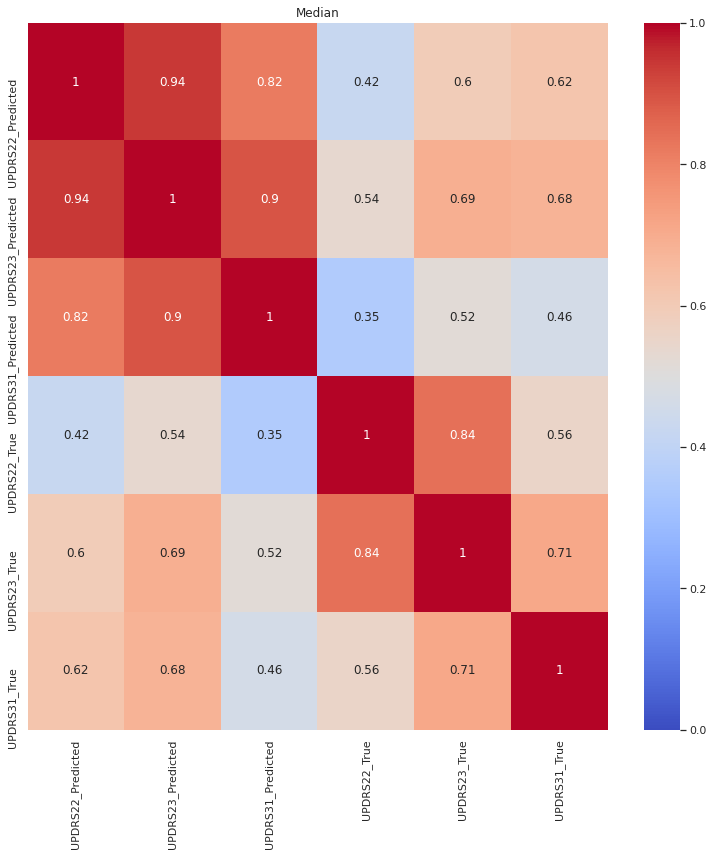

In [ ]:


# rc={'figure.figsize':(15,15)}

# print(corr)
sns.set(rc={'figure.figsize':(13,13)})

corrMatrix = df9.corr()
ax=sns.heatmap(corrMatrix, annot=True,vmin=0, vmax=1, center=0.5,cmap= 'coolwarm')
ax.set_title('Median')
figure = ax.get_figure()    
# figure.savefig('/content/gdrive/My Drive/Corr_Matrix_cnn100_median_51_DEEP.png', dpi=400)



In [ ]:
df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[0],[0]]

,UPDRS22_Predicted
UPDRS22_True,0.422946


In [ ]:
df10=pd.DataFrame()

In [ ]:
df7=pd.read_csv('/content/gdrive/My Drive/montelo10_3.csv')
df8=pd.read_csv('/content/gdrive/My Drive/montelo10_1.csv')
df9= pd.merge(df7, df8,left_index=True, right_index=True)
df10=df10.append([df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[0],[0]],df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[1],[1]],df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[2],[2]]],ignore_index=True)

In [ ]:
df10.dropna()
df10.std()

UPDRS22_Predicted    0.081331
UPDRS23_Predicted    0.044674
UPDRS31_Predicted    0.036827
dtype: float64

In [ ]:


df7=pd.read_csv('/content/gdrive/My Drive/montelo10_3.csv')
df8=pd.read_csv('/content/gdrive/My Drive/montelo10_1.csv')
df9= pd.merge(df7, df8,left_index=True, right_index=True)
sum1=sum1+df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[0],[0]]
sum2=sum2+df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[1],[1]]
sum3=sum3+df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[2],[2]]


In [ ]:
print(sum3)

              UPDRS31_Predicted
UPDRS31_True           4.932839


In [ ]:
sum1=sum1/10.0
sum2=sum2/10.0
sum3=sum3/10.0

print(sum1)
print(sum2)
print(sum3)

              UPDRS22_Predicted
UPDRS22_True           0.475234
              UPDRS23_Predicted
UPDRS23_True           0.759305
              UPDRS31_Predicted
UPDRS31_True           0.493284


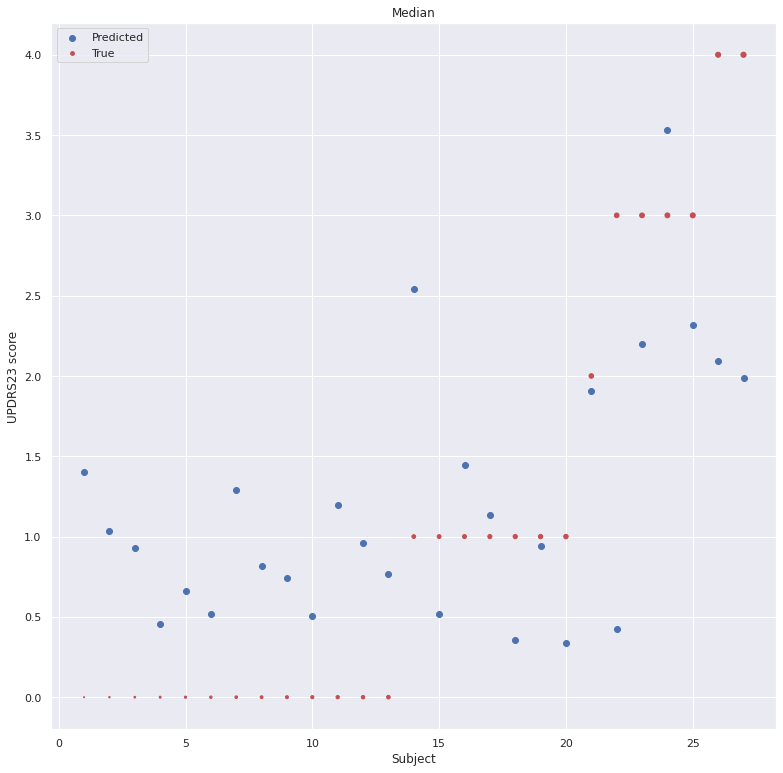

In [ ]:
df9.sort_values(by=['UPDRS23_True'],inplace=True)
x=np.arange(1,28, 1)
ax = plt.gca()
ax.scatter(x,np.array(df9['UPDRS23_Predicted']),color='b',marker="o",label='Predicted')
ax.scatter(x,np.array(df9['UPDRS23_True']),x,color='r',marker="o",label='True')
ax.set_xlabel('Subject')
ax.set_title('Median')
ax.set_ylabel('UPDRS23 score')
plt.legend(loc='upper left');
figure = ax.get_figure()    
# figure.savefig('/content/gdrive/My Drive/Scatter_plot_Median_UPDRS31_cnn100_51_DEEP.png', dpi=400)



In [ ]:

data_dem["ID"].unique().sum()

In [ ]:
import math 
import glob
import numpy as np
import pandas as pd
data_full=pd.DataFrame()
data2=pd.DataFrame()
data3=pd.DataFrame()
data4=pd.DataFrame()
data5=pd.DataFrame()
b=[]
# get all y.txt files from all subdirectories
ID=[]

all_files = glob.glob('/content/gdrive/My Drive/thesis/Data/S*/*.txt')

dimension=100

# widths=widths
i=0
for file in all_files :
     print(file)
     print(int(file[-12:-10]))
          
     temp = pd.read_csv(file,sep=' |,', engine='python', names = ['Press','Value1','Release','Value2','Np'],skiprows=1) 
#     print(temp)
#     temp['Release'] = temp['Release'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
#     print(temp)
#     print(temp['Value1'])
     X_flight= np.diff(sorted(temp['Value1']/1000.0))
    
#     print(X_flight)
     print(X_flight)

    # X_flight = np.where(~np.isnan(X_flight), X_flight, 0)
#     print(X_flight)

     X_flight=np.where(X_flight< 3, X_flight , 0)


     print(X_flight)
#     print(X_flight)
     X_hold= (temp['Value2'] - temp['Value1'])/1000.0
   
#     X_hold= np.where(~np.isnan(X_hold), X_hold,float(0) )

     X_hold = np.where(X_hold < 0.7 , X_hold , np.median(X_hold) )
#     print(X_hold)

#     print(type(X_hold))


     if len(X_flight) < dimension:

          X_flight = np.pad(X_flight, (math.floor((dimension - len(X_flight)) / 2),math.ceil ((dimension + 1 - len(X_flight)) / 2)), 'constant', constant_values=(0,0))
          X_hold = np.pad(X_hold,(math.floor((dimension - len(X_hold)) / 2), math.ceil((dimension + 1 - len(X_hold)) / 2)), 'constant', constant_values= (0,0))

     else:
         X_flight=X_flight[:dimension]
         X_hold=X_hold[:dimension]
     X_flight=X_flight[:100]
     print(X_flight)
     print(X_hold)
     X_hold=X_hold[:100]
     print(X_flight.shape)
     a=(int(file[-12:-10])) 
     print(type(a))    
     df33 = pd.DataFrame({ "ID" : a },index=[i])

     df11 = pd.DataFrame({"X_hold": [X_hold]},index=[i])

     data3=pd.concat([data3,df11],axis=0,ignore_index=False)
     df22 = pd.DataFrame({"X_flight": [X_flight]},index=[i])

    
     data4=pd.concat([data4,df22],axis=0,ignore_index=False)
     data5=pd.concat([data5,df33],axis=0,ignore_index=False) 
     i=i+1
     print(i)
data2=pd.concat([data4,data3],axis=1)
data_full=pd.concat([data2,data5],axis=1)

Streaming output truncated to the last 5000 lines.
 1.877 0.707 0.991 1.646 0.687 2.182 0.42  0.951 1.019 0.241 2.176 0.723
 1.982 0.42  0.657 0.776 1.02  0.723 1.016]
[0.906 1.018 1.003 1.828 0.346 0.648 0.557 0.    0.541 0.737 0.465 0.576
 1.055 1.547 2.202 0.553 0.505 1.108 0.762 1.57  0.71  0.722 0.925 2.886
 1.379 0.638 0.538 0.498 0.551 2.502 0.623 2.312 1.105 0.829 0.59  0.583
 1.877 0.707 0.991 1.646 0.687 2.182 0.42  0.951 1.019 0.241 2.176 0.723
 1.982 0.42  0.657 0.776 1.02  0.723 1.016]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.906 1.018
 1.003 1.828 0.346 0.648 0.557 0.    0.541 0.737 0.465 0.576 1.055 1.547
 2.202 0.553 0.505 1.108 0.762 1.57  0.71  0.722 0.925 2.886 1.379 0.638
 0.538 0.498 0.551 2.502 0.623 2.312 1.105 0.829 0.59  0.583 1.877 0.707
 0.991 1.646 0.687 2.182 0.42  0.951 1.019 0.241 2.176 0.723 1.982 0.42
 0.657 0.776 1.02  0.723 1.016 0.    0.    0.    0.    0.    0

In [ ]:
# data_full.reset_index(inplace=True)
# data_full
data_full['X_hold'].mean()

In [ ]:
df2['X_hold'].mean(
)

In [ ]:
data_full.drop(columns={'index'},inplace=True)


In [ ]:
temp=data_full["X_hold"].apply(pd.Series)
np.isnan(temp).sum().tail(50)

In [ ]:
data=pd.read_csv('C:/Users/pastal24/Desktop/thesis/test_data2.csv', sep=',')
# pd.read_csv('file1.csv', delim_whitespace = True)
data

In [ ]:
from pathlib import Path
from glob import glob
x = [path(f).abspath() for f in glob("C:\\Users\\pastal24\\Desktop\\thesis\\Data\\S01*.txt")]
print(x)

In [ ]:
import pathlib

py = pathlib.Path().glob("C:\\Users\\pastal24\\Desktop\\thesis\\Data\\*.txt")
for file in py:
    print(file)

In [ ]:
data_full=pd.read_csv("C:/Users/pastal24/Desktop/thesis/test_data.csv") 


In [ ]:

    
temp1 = df2['X_hold'].apply(pd.Series)
npa=temp1.to_numpy()
npa.mean()
# temp2 = data_full['X_hold'].apply(pd.Series)
# npa=np.dstack((temp1,temp2))
# npa = npa.swapaxes(1,2)


In [ ]:

ax=sns.distplot(npa,bins=bins, hist=True, kde=False, 
             
           
             )
# ax.set_ylabel('Subjects', size =15)
# ax.set_xlabel('MSE UPDRS22', size = 15)
figure = ax.get_figure()    
# figure.savefig('MSE_UPDRS22_cnn16_no_pdf.png', dpi=400)

In [ ]:
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

In [ ]:
        temp1 = data_full['X_Flight'].apply(pd.Series)
        temp2 = data_full['X_hold'].apply(pd.Series)
        npa=np.dstack((temp1,temp2))
        npa=npa[:,0:100,:]
        print(npa.shape)
        npa=np.nan_to_num(npa)
        npa = npa.swapaxes(1,2)
        npa=npa.reshape(-1 , 2, 30 , 1)
        X=npa
        temp4= np.asarray(data_dem['UPDRS 22'])
        temp5= np.asarray(data_dem['UPDRS 23'])
        temp6= np.asarray(data_dem['UPDRS 31'])
        temp7=np.dstack((temp4,temp5,temp6))
        temp7=np.nan_to_num(temp7)
        temp7=temp7.swapaxes(0,1).swapaxes(1,2)
        temp7=temp7.reshape(-1,3)
        

In [ ]:
import json
from tensorflow.keras.models import model_from_json
json_file = open('/content/gdrive/My Drive/thesis/autoencoders/CNN100.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/gdrive/My Drive/cnn100.h5")
print("Loaded model from disk")


In [ ]:
df2f2=df2.sample(frac=0.5)

In [ ]:







temp1 = df_tot['X_flight'].apply(pd.Series)
temp2 = df_tot['X_hold'].apply(pd.Series)
npa=np.dstack((temp1,temp2))
npa = npa.swapaxes(1,2)
npa=np.nan_to_num(npa)
npa=npa.reshape(-1 , 2, 100 , 1)
X=npa
X = np.asarray(X).astype(np.float32)
temp4= np.asarray(df_tot['UPDRS_22'])
temp5= np.asarray(df_tot['UPDRS_23'])
temp6= np.asarray(df_tot['UPDRS_31_E1_1_C1'])
temp7=np.dstack((temp4,temp5,temp6))
temp7=np.nan_to_num(temp7)
temp7=temp7.swapaxes(0,1).swapaxes(1,2)
print(temp7.shape)
temp7=temp7.reshape(-1,3)

#         temp7=temp7.reshape(-1,3,1,1)
y=temp7
y = np.asarray(y).astype(np.float32)

       
       

       
       
       

  # Encoder Layers

        

          
          # autoencoder.add(MaxPooling2D((1, 2), padding='same'))
                
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
          # autoencoder.add(Conv2D(32, (2,3),strides=(1,2) , padding='same'))
          # autoencoder.add(BatchNormalization())
          # autoencoder.add(Activation('relu'))

          # autoencoder.add(MaxPooling2D((1, 2), padding='same'))

          # autoencoder.add(Conv2D(64, (2, 3),strides=(1,5) , padding='same'))
          # autoencoder.add(BatchNormalization())
          # autoencoder.add(Activation('relu'))

          # autoencoder.add(Conv2D(48, (2, 2),strides=(1,5), activation='relu', padding='same'))


  # autoencoder.add(BatchNormalization())






  
  
  

  
  
  
  

  
  
  
  

      
      
      

      
      
      
      
      




      


      
      
      
model = Sequential()
        # for layer in autoencoder.layers[:-13]: 
        #     model.add(layer)
        #     layer.trainable=True
model.add(Conv2D(64, (2, 3) , padding='same',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (1, 1) , padding='same')) 
model.add(BatchNormalization())
   
model.add(Activation('relu'))   
model.add(Conv2D(64, (2, 3) , padding='same'))
model.add(BatchNormalization())

model.add(Activation('relu')) 
model.add(MaxPooling2D((1,2),padding='same'))
model.add(Conv2D(32, (2, 3) , padding='same'))
model.add(BatchNormalization())
    
model.add(Activation('relu'))    
model.add(Conv2D(32, (1, 1) , padding='same'))
model.add(BatchNormalization())
    
model.add(Activation('relu'))        
model.add(Conv2D(32, (2, 3) , padding='same')) 
model.add(BatchNormalization())
   
model.add(Activation('relu'))  
        # model.add(MaxPooling2D((1,2),padding='same'))
        # model.add(Conv2D(32, (2, 3) , padding='same')) 
        # model.add(BatchNormalization())
   
        # model.add(Activation('relu'))    
        # model.add(Conv2D(32, (1, 1) , padding='same')) 
        # model.add(BatchNormalization())
   
        # model.add(Activation('relu'))        
        # model.add(Conv2D(32, (2, 3) , padding='same')) 
        # model.add(BatchNormalization())
   
        # model.add(Activation('relu'))
         
        # model.add(GaussianNoise(0.05))
        # model.add(Dense(512,activation='relu'))

model.add(Flatten())
model.add(Dense(128))
        # model.add(GaussianNoise(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
        # model.add(GaussianNoise(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

        # model.add(Dense(64,use_bias='False'))

        # model.add(BatchNormalization())
        # model.add(Activation('relu'))
        # model.add(Dropout(0.4))



        # model.add(GaussianNoise(0.01))

        # model.add(Dense(16,activation='relu'))
        # model.add(Dropout(0.4))

        # model.add(Dense(512,activation='relu'))

        # model.add(GaussianNoise(0.01))

        # model.add(Dense(25,activation='relu'))
        # model.add(GaussianNoise(0.01))


# kernel_initializer='he_normal',bias_initializer=initializer
        # model.add(GaussianNoise(0.01))
        # model.add(Dense(512, activation='relu'))

        # model.add(Dense(96, activation='relu'))

        # model.add(Dense(512, activation='relu'))

        # model.add(Dense(2048,activation= 'relu'))
        # model.add(Dense(2048,activation='relu'))
#         model.add(Dense(512,activation='relu'))
        # model.add(GaussianNoise(0.01))

        # model.add(GaussianNoise(0.01))

#         model.add(Dense(256,activation='relu'))
#         model.add(Dense(256,activation='relu')) 
        # model.add(Dense(1024,activation='relu')) 
        # model.add(Dense(1024,activation='relu')) 
        # model.add(Dense(1024,activation='relu'))
#         model.add(Dense(32,activation='relu'))

model.add(Dense(3)) 

model.add(Activation('linear'))
model.summary()

X1=np.flip(X,2)
kek=[X,X1]
print(X1.shape)
X=np.concatenate(kek,axis=0)
X = np.asarray(X).astype(np.float32)
kek2=[y,y]
y=np.concatenate(kek2,axis=0)
y = np.asarray(y).astype(np.float32)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.05, random_state=42)
temp1 = df3['X_flight'].apply(pd.Series)
temp2 = df3['X_hold'].apply(pd.Series)
  
  
npa=np.dstack((temp1,temp2))
print(npa.shape)
npa = npa.swapaxes(1,2)
npa=npa.reshape(-1 , 2, 100 , 1)
X_test=npa
temp4= np.asarray(df3['UPDRS 22'])
temp5= np.asarray(df3['UPDRS 23'])
temp6= np.asarray(df3['UPDRS 31'])
temp7=np.dstack((temp4,temp5,temp6))
temp7=np.nan_to_num(temp7)
temp7=temp7.swapaxes(0,1).swapaxes(1,2)
temp7=temp7.reshape(-1,3)
temp7=temp7.reshape(-1,3,1,1)
y_test=temp7
print(y.shape)

        # training_generator, steps_per_epoch = balanced_batch_generator((X_train.reshape(X_train.shape[0],-1)), y_train[:,], sampler=NearMiss(), batch_size=64, random_state=42)
        
        # my_generator = ((np.reshape(X_train, (-1, 2, 100,-1)),np.reshape( y_train,(-1,3))) for (X_train,y_train) in training_generator)
        # history = model.fit_generator(generator=my_generator,
        #                                 steps_per_epoch=steps_per_epoch,
        #                                 epochs=50, verbose=0)
        # model.fit(X_train1,y_train1,epochs=50,batch_size=16)
opt3=tensorflow.keras.optimizers.Adam(learning_rate=1e-2,decay=1e-4,amsgrad='True')
model.compile(loss='mse', optimizer=opt3, metrics=['mae'])
history=model.fit(X_train,y_train,batch_size=96,
                epochs=75,callbacks=[tensorflow.keras.callbacks.ModelCheckpoint(filepath=filepathh, monitor='val_loss', save_best_only=True)],verbose=2,validation_data=(X_test,y_test))











































        

In [ ]:
        from tensorflow.keras.layers import GaussianNoise   
        model = Sequential()

        for layer in loaded_model.layers[:-4]: 
            model.add(layer)
            layer.trainable=True
            
        model.add(Flatten()) 
        
        model.add(Dense(512, activation='relu'))
        # model.add(Dropout(0.2))
#         model.add(GaussianNoise(0.05))

        model.add(Dense(512, activation='relu'))
        model.add(Dense(512, activation='relu'))
        # model.add(Dense(256, activation='relu'))
#         model.add(GaussianNoise(0.1))
        # model.add(Dropout(0.2))
        # model.add(Dense(,activation='relu'))
        # model.add(Dropout(0.5))
#         model.add(GaussianNoise(0.05))
        # model.add(Dropout(0.2))
#         model.add(Dense(64,activation= 'relu'))
        #         model.add(Dense(512,activation= 'relu'))


#      model.add(Dense(512,activation='relu'))
#         model.add(Dense(256,activation='relu'))

#         model.add(Dense(64,activation='relu'))
#         model.add(Dense(64,activation='relu')) 
#         model.add(Dense(64,activation= 'relu'))
#         model.add(Dense(64,activation='relu'))
#         model.add(Dense(64,activation='relu')) 
#         model.add(Dense(64,activation='relu'))
        model.add(Dense(3, activation="linear")) 
        opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4,decay=1e-6 )
        model.compile(loss='mse', optimizer=opt,metrics=['mae'])

        
        model.summary()

In [ ]:
from sklearn.preprocessing import Normalizer,QuantileTransformer,PowerTransformer
from sklearn import preprocessing



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
Rl=ReduceLROnPlateau(monitor='loss',patience=1,verbose=1)


In [ ]:
df2=df2.reset_index()
df2

In [ ]:
a=np.zeros(25)
df_tot=pd.DataFrame()
for i in range (18848):
    
    j=25
    
    if (df2['X_flight'][i][0:j] != np.zeros(25)).any() :
        print('True')
        df_new=df2.loc[i]
        df_tot=pd.concat([df_tot,df_new],axis=1)

In [ ]:
df_tot=df2 
# df_tot=df2[df2['UPDRS_22']<6]
df_tot=df_tot.reset_index()
df_tot.shape


(4624, 17)

In [ ]:

temp1 = df_tot['X_flight'].apply(pd.Series)
temp2 = df_tot['X_hold'].apply(pd.Series)


#         scaler2 = preprocessing.MinMaxScaler().fit(temp2)
#         temp2=scaler.transform(temp4)
#         temp3=scaler.transform(temp1)
#         print(temp3)
#         temp4=scaler2.transform(temp2)
npa=np.dstack((temp1,temp2))
npa=np.nan_to_num(npa)
#         npa=scaler.fit(npa)
        
# npa = npa.swapaxes(1,2)
#         npa2=np.flip(npa,2)

npa=npa.reshape(-1 , 100 , 2,1)
npa.shape

X=npa
X = np.asarray(X).astype(np.float32)

# X=np.concatenate(kek,axis=0)
# X = np.asarray(X).astype(np.float32)
# print(X_train.shape)        
temp4= np.asarray(df_tot['UPDRS_22'])
temp5= np.asarray(df_tot['UPDRS_23'])
temp6= np.asarray(df_tot['UPDRS_31_E1_1_C1'])
temp7=np.dstack((temp4,temp5,temp6))
temp7=np.nan_to_num(temp7)
temp7=temp7.swapaxes(0,1).swapaxes(1,2)
temp7=temp7.reshape(-1,3)

kek2=[temp7,temp7]
# y=np.concatenate(kek2,axis=0)
y=temp7
y=np.asarray(y).astype(np.float32)
# y=np.concatenate(kek2,axis=0)
# y=np.asarray(y).astype(np.float32)
print(y.shape)

# temp1 = df_new['X_flight'].apply(pd.Series)
# temp2 = df_new['X_hold'].apply(pd.Series)


#         scaler2 = preprocessing.MinMaxScaler().fit(temp2)
#         temp2=scaler.transform(temp4)
#         temp3=scaler.transform(temp1)
#         print(temp3)
#         temp4=scaler2.transform(temp2)
# npa=np.dstack((temp1,temp2))
# npa=np.nan_to_num(npa)
#         npa=scaler.fit(npa)
        
# npa = npa.swapaxes(1,2)
#         npa2=np.flip(npa,2)

# npa=npa.reshape(-1 , 100 , 2,1)
# npa.shape

# X_test=npa
# X_test = np.asarray(X_test).astype(np.float32)

# X=np.concatenate(kek,axis=0)
# X = np.asarray(X).astype(np.float32)
# print(X_train.shape)        
# temp4= np.asarray(df_new['UPDRS_22'])
# temp5= np.asarray(df_new['UPDRS_23'])
# temp6= np.asarray(df_new['UPDRS_31_E1_1_C1'])
# temp7=np.dstack((temp4,temp5,temp6))
# temp7=np.nan_to_num(temp7)
# temp7=temp7.swapaxes(0,1).swapaxes(1,2)
# temp7=temp7.reshape(-1,3)
# y_test=temp7
# y_test=np.asarray(y_test).astype(np.float32)


(4624, 3)


In [ ]:
Visible=Input((100,2,1))
                           
x=((Conv2D(16,(3,2),padding='same')))(Visible)

x=(BatchNormalization())(x)                
        
x=(Activation('relu'))(x)
        
x=((MaxPooling2D( (2,1) ,padding='same')))(x)  
x=((Conv2D(12, (3,2), padding='same')))(x)
x=(BatchNormalization())(x)

encoded=(Activation('relu'))(x)
        



x=((UpSampling2D((2,1))))(x)
x=((Conv2D(16, (3,2), padding='same')))(x)
x=(BatchNormalization())(x)

x=Activation('relu')(x)


decoded=((Conv2D(1, (3,2), activation='linear', padding='same')))(x)
        

#                 # Encoder Layers
# #                 # autoencoder.add(LSTM(25,return_sequences=False)
autoencoder = Model(Visible, decoded)

In [ ]:
Visible=Input((100,2))
x=(LSTM(16, input_shape= (100,2) ,activation='relu',return_sequences=True ))(Visible)
x=LSTM(8,activation='relu', return_sequences=False )(x)
encoded=(RepeatVector(X.shape[1]))(x)

x=LSTM(8,activation='relu' ,return_sequences=True )(encoded)
x=LSTM(16,activation='relu', return_sequences=True )(x)
decoded=TimeDistributed(Dense(X.shape[2],activation='linear'))(x)
autoencoder = Model( Visible , decoded )

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-2 )
autoencoder.compile(loss='mse',optimizer=opt,metrics=['mae'])
autoencoder.summary()
autoencoder.fit(X,X,epochs=30,batch_size=32,shuffle=True,verbose=2)
# from tensorflow.keras.models import model_from_json,load_model
# model= load_model('/content/gdrive/My Drive/models/best_model_11_10.h5')
# tensorflow.keras.utils.plot_model(autoencoder,show_shapes=True)
# tensorflow.keras.models.save_model(model,"model.h5")

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 16)           1216      
_________________________________________________________________
lstm_7 (LSTM)                (None, 8)                 800       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 100, 8)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 8)            544       
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 16)           1600      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 2)          

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
H=Flatten()(encoded)
output=(Dense(16))(H)
output=BatchNormalization()(output)
output=(Activation('relu'))(output)
output=Dropout(0.5)(output)
        # output=(Dense(16))(output)
        # output=BatchNormalization()(output)
        # output=(Activation('relu'))(output)
        # output=Dropout(0.5)(output)
# attention=Dense(16)(H)
# attention=BatchNormalization()(attention)
# attention=Activation('tanh')(attention)
#         # attention=Dropout(0.5)(attention)
# attention=Dense(3)(attention)
# attention=tensorflow.transpose(attention,perm=[0, 2, 1])
# attention=Softmax()(attention)

# output=tensorflow.matmul(attention,output)
# output=Flatten()(output)

output2=(Dense(3))(output)
output2=(Activation('linear'))(output2)





        
model = Model(Visible,outputs=output2)

        # steps_per_epoch=np.floor(X_train.shape[0]/256).astype('int')
        # model=load_model('model.h5')
opt3=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=['mse'], optimizer=opt3, metrics=['mae'])
model.summary()
history=model.fit(X,y,batch_size=32,steps_per_epoch=np.floor(X.shape[0]/32).astype('int'),
                epochs=60,verbose=2)
# from tensorflow.keras.models import model_from_json,load_model
# model= load_model('/content/gdrive/My Drive/models/best_model_11_10.h5')
# tensorflow.keras.utils.plot_model(model,show_shapes=True)
# tensorflow.keras.models.save_model(model,"model.h5")

In [ ]:
for i in range (1,11):
  tensorflow.random.set_seed(
    i)
  Visible=Input((100,2,1))
                           
  x=((Conv2D(16,(3,2),padding='same')))(Visible)

  x=(BatchNormalization())(x)                
          
  x=(Activation('relu'))(x)
          
  x=((MaxPooling2D( (2,1) ,padding='same')))(x)  
  x=((Conv2D(12, (3,2), padding='same')))(x)
  x=(BatchNormalization())(x)

  encoded=(Activation('relu'))(x)
          



  x=((UpSampling2D((2,1))))(x)
  x=((Conv2D(16, (3,2), padding='same')))(x)
  x=(BatchNormalization())(x)

  x=Activation('relu')(x)


  decoded=((Conv2D(1, (3,2), activation='linear', padding='same')))(x)
          

  #                 # Encoder Layers
  # #                 # autoencoder.add(LSTM(25,return_sequences=False)
  autoencoder = Model(Visible, decoded) 
  opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-2 )
  autoencoder.compile(loss='mse',optimizer=opt,metrics=['mae'])
  autoencoder.summary()
  autoencoder.fit(X,X,epochs=30,batch_size=32,shuffle=True,verbose=2)

  H=Flatten()(encoded)
  output=(Dense(16))(H)
  output=BatchNormalization()(output)
  output=(Activation('relu'))(output)
  output=Dropout(0.5)(output)
          # output=(Dense(16))(output)
          # output=BatchNormalization()(output)
          # output=(Activation('relu'))(output)
          # output=Dropout(0.5)(output)
  # attention=Dense(16)(H)
  # attention=BatchNormalization()(attention)
  # attention=Activation('tanh')(attention)
  #         # attention=Dropout(0.5)(attention)
  # attention=Dense(3)(attention)
  # attention=tensorflow.transpose(attention,perm=[0, 2, 1])
  # attention=Softmax()(attention)

  # output=tensorflow.matmul(attention,output)
  # output=Flatten()(output)

  output2=(Dense(3))(output)
  output2=(Activation('linear'))(output2)





          
  model = Model(Visible,outputs=output2)

          # steps_per_epoch=np.floor(X_train.shape[0]/256).astype('int')
          # model=load_model('model.h5')
  opt3=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

  model.compile(loss=['mse'], optimizer=opt3, metrics=['mae'])
  model.summary()
  history=model.fit(X,y,batch_size=32,steps_per_epoch=np.floor(X.shape[0]/32).astype('int'),
                  epochs=60,verbose=2)
  # from tensorflow.keras.models import model_from_json,load_model
  # model= load_model('/content/gdrive/My Drive/models/best_model_11_10.h5')
  # tensorflow.keras.utils.plot_model(model,show_shapes=True)
  tensorflow.keras.models.save_model(model,"model_%d.h5"%(i))


Model: "functional_1593"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_399 (InputLayer)       [(None, 100, 2, 1)]       0         
_________________________________________________________________
conv2d_1592 (Conv2D)         (None, 100, 2, 16)        112       
_________________________________________________________________
batch_normalization_1592 (Ba (None, 100, 2, 16)        64        
_________________________________________________________________
activation_1990 (Activation) (None, 100, 2, 16)        0         
_________________________________________________________________
max_pooling2d_398 (MaxPoolin (None, 50, 2, 16)         0         
_________________________________________________________________
conv2d_1593 (Conv2D)         (None, 50, 2, 12)         1164      
_________________________________________________________________
batch_normalization_1593 (Ba (None, 50, 2, 12)     

In [ ]:
sum1=0
sum2=0
sum3=0
        
for i in range (1,11):
  saved_model=load_model('model_%d.h5'%(i))
  y_hat = saved_model.predict(X_test)
  y_hat1=np.median(y_hat[:,0])
  y_hat2=np.median(y_hat[:,1])
  y_hat3=np.median(y_hat[:,2])
  sum1=sum1+y_hat1
  sum2=sum2+y_hat2
  sum3=sum3+y_hat3

y_hat1=sum1/10.0
y_hat2=sum2/10.0
y_hat3=sum3/10.0

In [ ]:
df10=df9.append({"UPDRS22_Predicted":y_hat1,"UPDRS23_Predicted":y_hat2,"UPDRS31_Predicted":y_hat3,"UPDRS22_True":7.0,"UPDRS23_True":5.0,"UPDRS31_True":2.0},ignore_index=True)
df10

,UPDRS22_Predicted,UPDRS23_Predicted,UPDRS31_Predicted,UPDRS22_True,UPDRS23_True,UPDRS31_True
0,0.931259,0.850512,0.619939,0.0,0.0,0.0
1,0.388335,0.957859,0.893668,0.0,0.0,0.0
2,0.978960,0.751282,0.652146,0.0,0.0,0.0
3,0.693754,0.586140,0.528320,0.0,0.0,0.0
4,0.682731,0.623512,0.511887,0.0,0.0,0.0
5,0.960438,0.638229,0.520282,0.0,0.0,0.0
6,1.189730,1.317596,0.711764,0.0,0.0,1.0
7,0.728550,0.896067,0.680871,0.0,0.0,0.0
8,0.817806,0.779411,0.626993,0.0,0.0,0.0
9,0.726610,0.603548,0.430715,1.0,0.0,0.0


In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-3,nesterov=True,momentum=0.9 )
model.compile(loss='mse', optimizer=opt,metrics=['mae'])
model.fit(X, y, epochs=50,batch_size=32)

Epoch 1/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4390 - mae: 0.4948
Epoch 2/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4328 - mae: 0.4876
Epoch 3/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4351 - mae: 0.4877
Epoch 4/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4229 - mae: 0.4808
Epoch 5/50
173/173 [==============================] - 1s 6ms/step - loss: 0.4398 - mae: 0.4887
Epoch 6/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4312 - mae: 0.4844
Epoch 7/50
173/173 [==============================] - 1s 6ms/step - loss: 0.4409 - mae: 0.4897
Epoch 8/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4327 - mae: 0.4859
Epoch 9/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4299 - mae: 0.4818
Epoch 10/50
173/173 [==============================] - 1s 5ms/step - loss: 0.4375 - mae: 0.4835
Epoch 11/50
173/173 [============================

In [ ]:
df3=pd.merge(data_dem, data_full, on='ID')
df3['ID']

0       1
1       1
2       1
3       1
4       1
       ..
300    33
301    33
302    33
303    33
304    33
Name: ID, Length: 305, dtype: int64

In [ ]:
df3=df3[(df3['UPDRS 23'] < 3) ]
df3=df3[(df3['UPDRS 22'] < 3 ) ]
df3=df3.reset_index()

In [ ]:
import numpy as np
from tensorflow.keras.models import model_from_json,load_model

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(n_splits=33)
groups=df3['ID']
GroupKFold(n_splits=33)
scores=[]
scores1=[]
scores2=[]
scores3=[]
scores4=[]
saved_model=load_model('model_10.h5')
# saved_model.summary()
for train_index, test_index in group_kfold.split(df3,df3, groups):

#         model = Sequential()
#         for layer in loaded_model.layers[:-4]: 
#             model.add(layer)
            
#         model.add(Flatten()) 
        # saved_model=load_model('/content/gdrive/My Drive/models/best_model_9_9.h5')


#         model.add(Dense(1024,activation= 'relu'))
#         model.add(Dense(512,activation='relu'))
#         model.add(Dense(256,activation='relu')) 

#         model.add(Dense(128,activation='relu'))

#         model.add(Dense(3, activation='linear')) 
#         model.summary()

        
        temp1 = df3['X_flight'].apply(pd.Series)
        temp2 = df3['X_hold'].apply(pd.Series)

        
#         temp1=scaler.transform(temp1)
        
#         temp2=scaler2.transform(temp2)
        npa=np.dstack((temp1,temp2))

        print(npa.shape)

        # npa = npa.swapaxes(1,2)
        npa=npa.reshape(-1 ,100, 2 ,1)
        X=npa
        temp4= np.asarray(df3['UPDRS 22'])
        temp5= np.asarray(df3['UPDRS 23'])
        temp6= np.asarray(df3['UPDRS 31'])
        temp7=np.dstack((temp4,temp5,temp6))
        temp7=np.nan_to_num(temp7)
        temp7=temp7.swapaxes(0,1).swapaxes(1,2)
        temp7=temp7.reshape(-1,3)
#         temp7=temp7.reshape(-1,3,1,1)
        y=temp7
        print(y.shape)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
#         print(X_test)
#         print(y_test)
        # opt3=tensorflow.keras.optimizers.Adam(learning_rate=1e-3,decay=1e-5,amsgrad='True')

        # saved_model.compile(loss='mse', optimizer=opt3, metrics=['mae'])
    
        # saved_model.fit(X_train, y_train,
                # epochs=50)
#        
        
        
      
        
        # sum1=0
        # sum2=0
        # sum3=0
        
        # for i in range (1,11):
        #   saved_model=load_model('model_%d.h5'%(i))
        y_hat = saved_model.predict(X_test)
        #   y_hat1=np.median(y_hat[:,0])
        #   y_hat2=np.median(y_hat[:,1])
        #   y_hat3=np.median(y_hat[:,2])
        #   sum1=sum1+y_hat1
        #   sum2=sum2+y_hat2
        #   sum3=sum3+y_hat3


        # y_hat1=sum1/10.0
        # y_hat2=sum2/10.0
        # y_hat3=sum3/10.0

        # print(y_hat)
        # test_mse=[]
        # test_mse1 = mean_squared_error(y_test[:,:1], y_hat[:,:1])
        # test_mse2 = mean_squared_error(y_test[:,1:2], y_hat[:,1:2])
        # test_mse3 = mean_squared_error(y_test[:,2:3], y_hat[:,2:3])
        # test_mse.append(test_mse1)
        # test_mse.append(test_mse2)
        # test_mse.append(test_mse3)
        
        # scores.append(test_mse)
        
        y_test1=y_test[0][0]
        y_test2=y_test[0][1]
        y_test3=y_test[0][2]
        y_test4=[]
        y_test4.append(y_test1)
        y_test4.append(y_test2)
        y_test4.append(y_test3)
        scores1.append(y_test4)
        print(y_test4)
        # print(y_test4)
        # y_hat1=y_hat[:,0].mean()
        # y_hat2=y_hat[:,1].mean()
        # y_hat3=y_hat[:,2].mean()
        # y_hatm=[]
        # y_hatm.append(y_hat1)
        # y_hatm.append(y_hat2)
        # y_hatm.append(y_hat3)
        # print(y_hatm)
        # scores2.append(y_hatm)

        y_hat1=np.median(y_hat[:,0])
        y_hat2=np.median(y_hat[:,1])
        y_hat3=np.median(y_hat[:,2])
        y_hatmm=[]
        y_hatmm.append(y_hat1)
        y_hatmm.append(y_hat2)
        y_hatmm.append(y_hat3)
        scores3.append(y_hatmm)
        print(y_hatmm)
        
        # y_hat1=np.percentile(y_hat[:,0],75)
        # y_hat2=np.percentile(y_hat[:,1],75)
        # y_hat3=np.percentile(y_hat[:,2],75)
        # y_hatq75=[]
        # y_hatq75.append(y_hat1)
        # y_hatq75.append(y_hat2)
        # y_hatq75.append(y_hat3)
        # scores4.append(y_hatq75)
        # print(y_hatq75)
        

(305, 100, 2)
(305, 3)
[1, 1, 0]
[1.7033945, 1.5021191, 0.8176484]
(305, 100, 2)
(305, 3)
[2, 2, 0]
[2.3531952, 2.923308, 1.0342565]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[1.9629492, 2.1442795, 0.93461597]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[2.0934072, 1.5135225, 0.6799735]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[1.0429616, 1.2380949, 0.6581604]
(305, 100, 2)
(305, 3)
[3, 4, 2]
[2.4540472, 2.776855, 1.051588]
(305, 100, 2)
(305, 3)
[1, 1, 0]
[0.973823, 0.9599863, 0.6312381]
(305, 100, 2)
(305, 3)
[4, 4, 2]
[2.1745048, 2.0610173, 0.88602394]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[0.9222192, 1.1134965, 0.7400035]
(305, 100, 2)
(305, 3)
[1, 1, 0]
[1.5772785, 1.8982103, 0.85435504]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[0.65507615, 0.5460453, 0.40207788]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[0.4422498, 0.21101001, 0.14797622]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[0.8702264, 0.82940984, 0.57258546]
(305, 100, 2)
(305, 3)
[0, 0, 0]
[0.34837094, 0.83920336, 0.6556202]
(305, 100, 2)
(305, 3)
[3, 3, 1]
[0.91961, 0.7707598, 0

In [ ]:
import csv
temp=['UPDRS22_True','UPDRS23_True','UPDRS31_True']
with open('/content/gdrive/My Drive/test10_1_3.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(temp )
    for i in range (0,33):
        csv_writer.writerow(scores1[i])

In [ ]:
temp=['UPDRS22_Predicted','UPDRS23_Predicted','UPDRS31_Predicted']
with open('/content/gdrive/My Drive/test10_3_3.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(temp )
    for i in range (0,33):
        csv_writer.writerow(scores3[i])

In [ ]:
df_test1=pd.read_csv('/content/gdrive/My Drive/test8_3_3.csv')
df_test2=pd.read_csv('/content/gdrive/My Drive/test8_1_3.csv')
# df_test1=df_test1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:


df5= pd.merge(df_test1, df_test2,left_index=True, right_index=True)
# df5.sort_values(by=['UPDRS23_True'],inplace=True)
# df5=df5.drop([19,31])



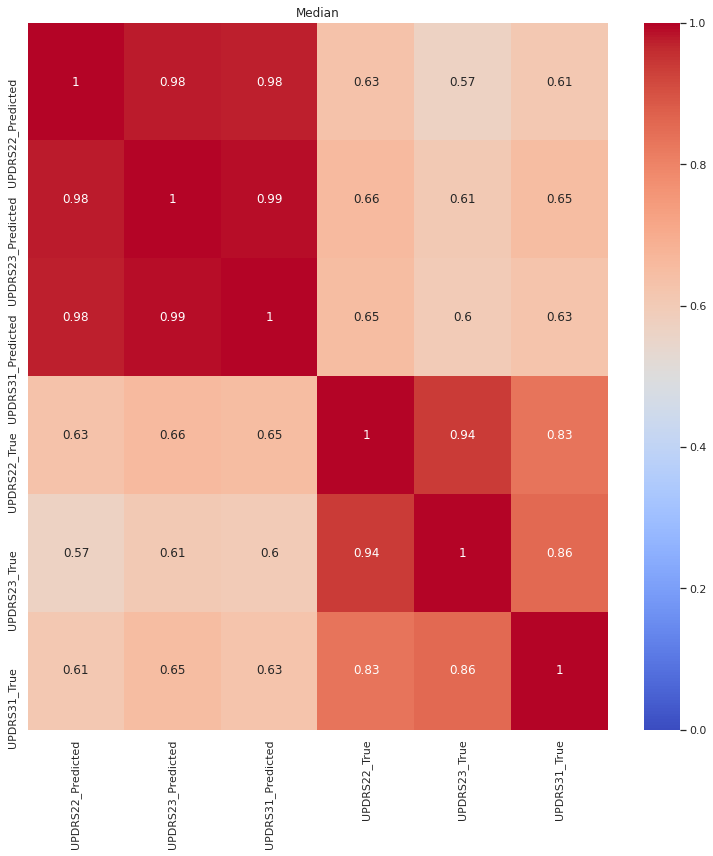

In [ ]:



sns.set(rc={'figure.figsize':(13,13)})

corrMatrix = df5.corr()
ax=sns.heatmap(corrMatrix, annot=True,vmin=0, vmax=1, center=0.5,cmap= 'coolwarm')
ax.set_title('Median')
figure = ax.get_figure()    
# figure.savefig('Corr_Matrix_cnn100_median_test.png', dpi=400)


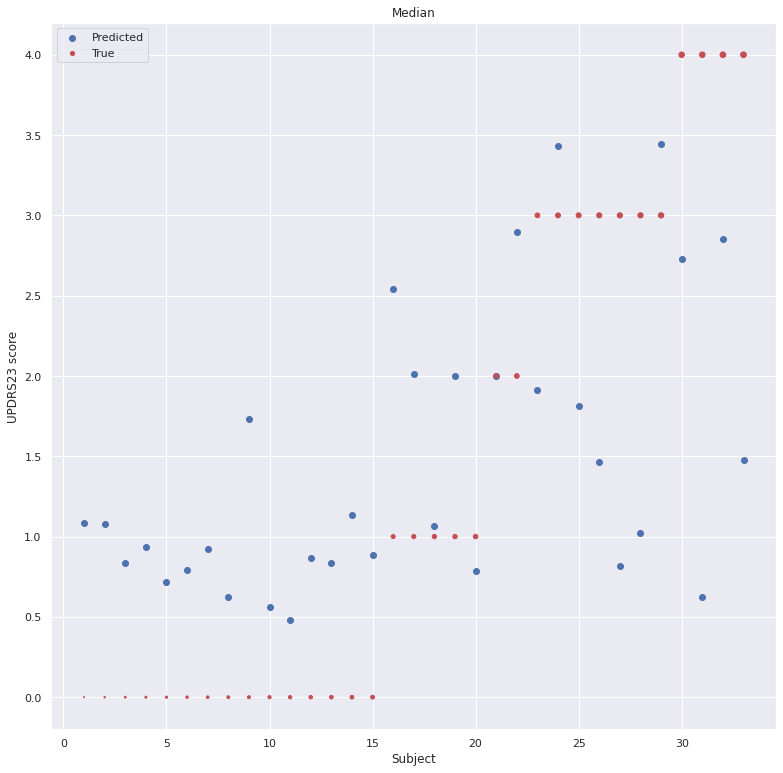

In [ ]:

df5.sort_values(by=['UPDRS23_True'],inplace=True)
x=np.arange(1,34, 1)
ax = plt.gca()
ax.scatter(x,np.array(df5['UPDRS23_Predicted']),color='b',marker="o",label='Predicted')
ax.scatter(x,np.array(df5['UPDRS23_True']),x,color='r',marker="o",label='True')
ax.set_xlabel('Subject')
ax.set_title('Median')
ax.set_ylabel('UPDRS23 score')
plt.legend(loc='upper left');
figure = ax.get_figure()    
# figure.savefig('Scatter_plot_Median_UPDRS23_cnn100_test.png', dpi=400)


In [ ]:
df10=pd.DataFrame()


In [ ]:
df7=pd.read_csv('/content/gdrive/My Drive/test10_3_3.csv')
df8=pd.read_csv('/content/gdrive/My Drive/test10_1_3.csv')
df9= pd.merge(df7, df8,left_index=True, right_index=True)
df10=df10.append([df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[0],[0]],df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[1],[1]],df9.corr().iloc[[3,4,5],[0,1,2]].iloc[[2],[2]]],ignore_index=True)

In [ ]:
df10.mean()

UPDRS22_Predicted    0.549572
UPDRS23_Predicted    0.563727
UPDRS31_Predicted    0.516990
dtype: float64

In [ ]:
df10.std()

UPDRS22_Predicted    0.091279
UPDRS23_Predicted    0.057012
UPDRS31_Predicted    0.103596
dtype: float64

In [ ]:
df10.mean()

UPDRS22_Predicted    0.531326
UPDRS23_Predicted    0.576368
UPDRS31_Predicted    0.572276
dtype: float64

In [ ]:
df10.std()

UPDRS22_Predicted    0.050340
UPDRS23_Predicted    0.047530
UPDRS31_Predicted    0.051432
dtype: float64